In [1]:
import pandas as pd
import numpy as np

In [2]:
na_prop = pd.read_csv('../results/figures/na_prop.csv')
df = pd.read_csv("../data/merged_data_clean.csv")

In [3]:
len(df.columns)

146

In [4]:
to_cat = ["SEQN", "RIAGENDR", "RIDRETH3", "DMDEDUC2", "DMDMARTZ", "DBQ095Z", "DBD100", "DRQSPREP", "DR1TWSZ", "DSDANTA", "DSD128V", "DSD128FF", "BPQ020", "BPQ080", "BPQ050A", "DIQ010", "DIQ050", "DIQ070", "DIQ160", "DBQ700", "KIQ022", "KIQ026", "KIQ005", "KIQ010", "KIQ042", "KIQ044", "KIQ046", "PAQ605", "PAQ620", "PAQ635", "PAQ650", "PAQ665", "SMQ020", "SMQ040", "SMD460", "SMD470", "SLQ050"]

df = df.apply(lambda x: x.astype("object") if x.name in to_cat else x)
df.reset_index(drop = True, inplace = True)

In [5]:
na_prop

,Feature,Proportion
0,SEQN,0.000000
1,RIAGENDR,0.000000
2,RIDAGEYR,0.000000
3,RIDRETH3,0.000000
4,INDFMPIR,0.152150
...,...,...
140,DR1TP226,0.165182
141,DR1_320Z,0.165182
142,DR1_330Z,0.165182
143,DR1BWATZ,0.165182


In [6]:
valid_features = na_prop[na_prop['Proportion'] < 0.4]['Feature'].tolist()
len(valid_features)

129

In [7]:
all_variables = ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH3', 'INDFMPIR', 'DMDEDUC2', 'DMDMARTZ', 'DBQ095Z', 'DBD100', 'DRQSPREP', 'DSDANTA', 'DSD128V', 'DSD128FF', 'DSQTKCAL', 'BMXBMI', 'BPXOSY1', 'BPXOSY2', 'BPXOSY3', 'BPXODI1', 'BPXODI2', 'BPXODI3', 'BPXOPLS1', 'BPXOPLS2', 'BPXOPLS3', 'LBXSBU', 'LBXSCA', 'LBXSUA', 'URDACT', 'URDFLOW1', 'URDFLOW2', 'URDFLOW3', 'LBXGLU', 'URXUPB', 'BPQ020', 'BPQ080', 'BPQ050A', 'DIQ010', 'DIQ050', 'DIQ070', 'DIQ160', 'DBD895', 'DBD900', 'DBD905', 'DBD910', 'DBQ700', 'KIQ022', 'KIQ026', 'KIQ005', 'KIQ010', 'KIQ042', 'KIQ044', 'KIQ046', 'KIQ480', 'MCQ080', 'MCQ160M', 'MCQ520', 'MCQ550', 'MCQ366A', 'MCQ366B', 'MCQ366C', 'MCQ366D', 'MCQ160L', 'MCQ300C', 'PAQ605', 'PAQ620', 'PAQ635', 'PAQ650', 'PAQ665', 'PAD680', 'SMQ020', 'SMQ040', 'SMD460', 'SMD470', 'ALQ130', 'SLQ050', 'RXDDAYS', 'RXDCOUNT', 'DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 'DR1TFIBE', 'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL', 'DR1TATOC', 'DR1TATOA', 'DR1TRET', 'DR1TVARA', 'DR1TACAR', 'DR1TBCAR', 'DR1TCRYP', 'DR1TLYCO', 'DR1TLZ', 'DR1TVB1', 'DR1TVB2', 'DR1TNIAC', 'DR1TVB6', 'DR1TFOLA', 'DR1TFA', 'DR1TFF', 'DR1TFDFE', 'DR1TCHL', 'DR1TVB12', 'DR1TB12A', 'DR1TVC', 'DR1TVD', 'DR1TVK', 'DR1TCALC', 'DR1TPHOS', 'DR1TMAGN', 'DR1TIRON', 'DR1TZINC', 'DR1TCOPP', 'DR1TSODI', 'DR1TPOTA', 'DR1TSELE', 'DR1TCAFF', 'DR1TTHEO', 'DR1TALCO', 'DR1TMOIS', 'DR1TS040', 'DR1TS060', 'DR1TS080', 'DR1TS100', 'DR1TS120', 'DR1TS140', 'DR1TS160', 'DR1TS180', 'DR1TM161', 'DR1TM181', 'DR1TM201', 'DR1TM221', 'DR1TP182', 'DR1TP183', 'DR1TP184', 'DR1TP204', 'DR1TP205', 'DR1TP225', 'DR1TP226', 'DR1_320Z', 'DR1_330Z', 'DR1BWATZ', 'DR1TWSZ']
filtered_variables = [var for var in all_variables if var in valid_features]

In [16]:
if 'KIQ026' in filtered_variables:
    filtered_variables.remove('KIQ026')

In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = df[filtered_variables]
X = X.drop("SEQN", axis=1)
y = df['KIQ026']

# Convert to 1 for "has kidney stone" (originally 1) and 0 for "not has kidney stone" (originally 2)
y = (y == 1).astype(int)
y


0       0
1       0
2       0
3       1
4       0
       ..
9203    0
9204    0
9205    0
9206    0
9207    1
Name: KIQ026, Length: 9208, dtype: int32

##  Data Preprocessing and Data Augmentation

In [9]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Pipeline

In [10]:
from sklearn.pipeline import Pipeline

preprocessor = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])


In [11]:
# Fit the preprocessor on the training data and transform both training and test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [27]:
len(X_train_preprocessed)

6445

### Data Augmentation using SMOTE

In [35]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_preprocessed, y_train)

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample data for demonstration


def plot_smote_comparison_clustered(y_original, y_smote):
    # Get class labels and counts
    classes = np.unique(np.concatenate((y_original, y_smote)))
    original_counts = pd.Series(y_original).value_counts().reindex(classes).fillna(0)
    smote_counts = pd.Series(y_smote).value_counts().reindex(classes).fillna(0)

    # Set up the plot with a smaller figure size
    fig, ax = plt.subplots(figsize=(6, 4))

    # Set the width of each bar and positions of the bars
    width = 0.25  # Make the bars a bit smaller
    x = np.arange(2)  # Two positions: Before SMOTE and After SMOTE

    # Create the clustered bars using consistent colors
    ax.bar(x[0] - width/2, original_counts[0], width, label='No Kidney Stones', color='C0')
    ax.bar(x[0] + width/2, original_counts[1], width, label='Had Kidney Stones', color='C1')
    ax.bar(x[1] - width/2, smote_counts[0], width, color='C0')
    ax.bar(x[1] + width/2, smote_counts[1], width, color='C1')

    # Customize the plot
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title('Class Distribution Before and After SMOTE', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(['Before SMOTE', 'After SMOTE'], fontsize=12)
    ax.legend(fontsize=10, loc='upper left')

    # Set a larger y-axis scale
    ax.set_ylim(0, max(original_counts.max(), smote_counts.max()) + 4000)

    # Add value labels on the bars
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fontsize=10)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.savefig("../results/figures/SMOTE_data_smaller_plot.pdf", format="pdf", bbox_inches='tight', dpi=300)
    plt.show()

plot_smote_comparison_clustered(y_train, y_train_smote)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7716\2752854.py:44: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


## Model Building

### Algorithms and Hyperparameter Tuning 

In [16]:
y_train.shape

(6445,)

In [17]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.inspection import permutation_importance
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from scipy.stats import randint, uniform, loguniform

models = {
    'GradientBoosting': (GradientBoostingClassifier(), {
        'n_estimators': randint(50, 500),
        'learning_rate': loguniform(1e-4, 1e0),
        'max_depth': randint(1, 10),
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 20),
        'subsample': uniform(0.5, 0.5),  # from 0.5 to 1.0
        'max_features': uniform(0, 1)
    }),
    'LightGBM': (LGBMClassifier(), {
        'n_estimators': randint(50, 500),
        'learning_rate': loguniform(1e-4, 1e0),
        'num_leaves': randint(20, 100),
        'max_depth': randint(-1, 20),  # -1 means no limit
        'min_child_samples': randint(1, 50),
        'subsample': uniform(0.5, 0.5),  # from 0.5 to 1.0
        'colsample_bytree': uniform(0.5, 0.5)  # from 0.5 to 1.0
    }),
    'VotingClassifier': (VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('dt', DecisionTreeClassifier()),
        ('svm', SVC(probability=True))
    ]), {
        'voting': ['hard', 'soft'],
        'lr__C': loguniform(1e-4, 1e4),
        'lr__penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'dt__max_depth': randint(1, 20),
        'dt__min_samples_split': randint(2, 20),
        'dt__min_samples_leaf': randint(1, 20),
        'svm__C': loguniform(1e-4, 1e4),
        'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    })
}


In [18]:
def train_and_evaluate(model, param_distributions, X_train, y_train, X_test, y_test, feature_names, n_iter=8):
    # Perform randomized search with cross-validation
    random_search = RandomizedSearchCV(model, param_distributions, n_iter=n_iter, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)
    
    # Get the best model
    best_model = random_search.best_estimator_
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Handle ROC AUC for multi-class
    if y_test.ndim > 1:
        # Multi-class
        roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr', average='weighted')
    else:
        # Binary class
        roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
    
    # Perform cross-validation
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
    
    # Calculate feature importance
    if hasattr(best_model, 'feature_importances_'):
        importances = best_model.feature_importances_
        feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importances})
        feature_importance = feature_importance.sort_values('importance', ascending=False)
    else:
        # Use permutation importance for models without built-in feature importance
        perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)
        feature_importance = pd.DataFrame({'feature': feature_names, 'importance': perm_importance.importances_mean})
        feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    return {
        'model': best_model,
        'best_params': random_search.best_params_,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'cv_scores': cv_scores,
        'feature_importance': feature_importance
    }

In [19]:
# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing pipeline
preprocessor = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_preprocessed, y_train)

# Get feature names (assuming X is a DataFrame, if not, replace with a list of feature names)
feature_names = X.columns.tolist()

In [20]:
models = {
    'GradientBoosting': (GradientBoostingClassifier(), {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }),
    'LightGBM': (LGBMClassifier(), {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'num_leaves': [31, 63]
    }),
    'VotingClassifier': (VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('dt', DecisionTreeClassifier()),
        ('svm', SVC(probability=True))
    ]), {
        'voting': ['hard', 'soft'],
        'lr__C': [0.1, 1.0],
        'dt__max_depth': [3, 5],
        'svm__C': [0.1, 1.0]
    })
}

In [ ]:
results = {}
for name, (model, param_grid) in models.items():
    print(f"Training and evaluating {name}...")
    results[name] = train_and_evaluate(model, param_grid, X_train_smote, y_train_smote, X_test_preprocessed, y_test, feature_names)

Training and evaluating GradientBoosting...



Results for GradientBoosting:
Best parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}
Accuracy: 0.9102
Precision: 0.8523
Recall: 0.9102
F1 Score: 0.8726
ROC AUC: 0.6313
Cross-validation scores: [0.7306701  0.99527288 0.9965621  0.99441341 0.99355393]
Mean CV Score: 0.9421 (+/- 0.2114)


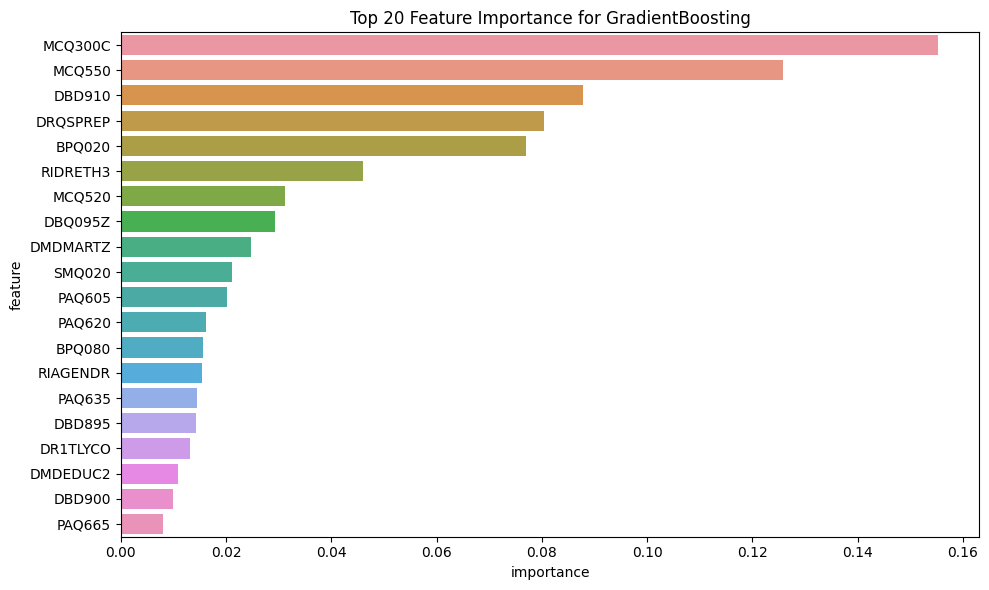


Results for LightGBM:
Best parameters: {'num_leaves': 63, 'n_estimators': 200, 'learning_rate': 0.1}
Accuracy: 0.9121
Precision: 0.8565
Recall: 0.9121
F1 Score: 0.8729
ROC AUC: 0.6282
Cross-validation scores: [0.7306701  0.99570262 0.99742157 0.9965621  0.99785131]
Mean CV Score: 0.9436 (+/- 0.2130)


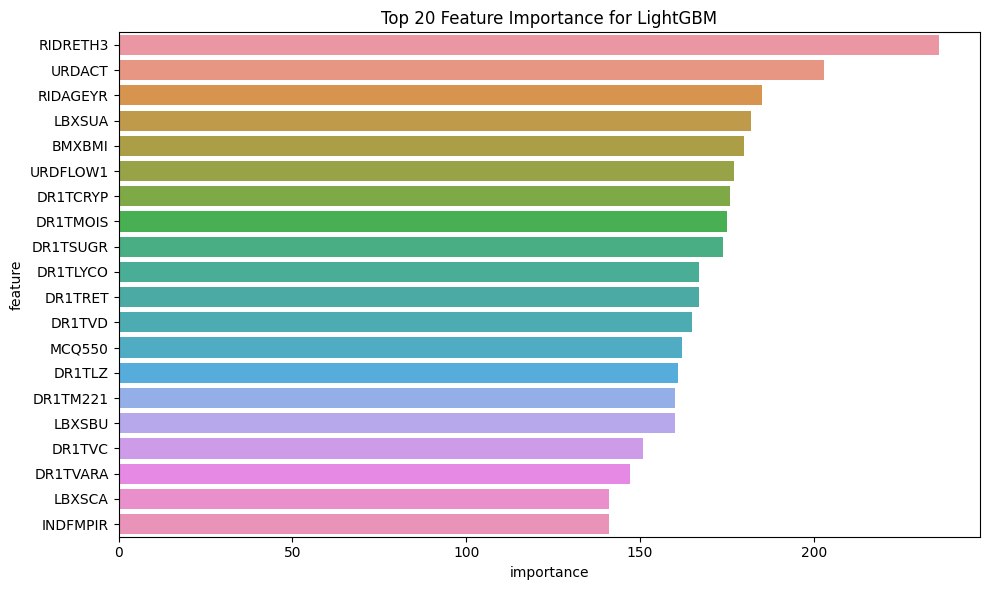


Results for VotingClassifier:
Best parameters: {'voting': 'soft', 'svm__C': 1.0, 'lr__C': 0.1, 'dt__max_depth': 5}
Accuracy: 0.8625
Precision: 0.8494
Recall: 0.8625
F1 Score: 0.8558
ROC AUC: 0.5858
Cross-validation scores: [0.84664948 0.92952299 0.93940696 0.93897722 0.93553932]
Mean CV Score: 0.9180 (+/- 0.0717)


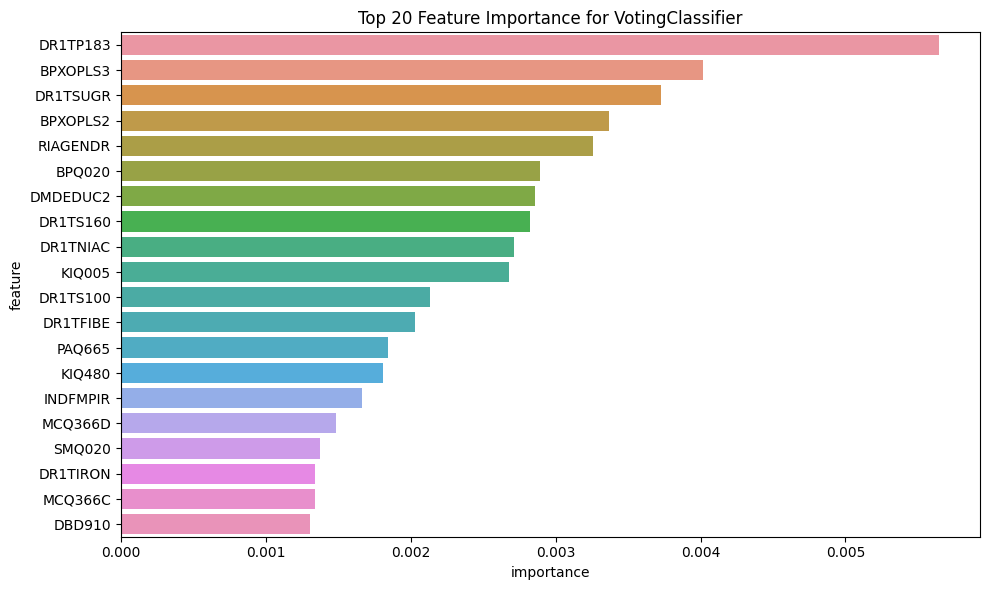

In [32]:
# Print results and plot feature importance
for name, result in results.items():
    print(f"\nResults for {name}:")
    print(f"Best parameters: {result['best_params']}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Precision: {result['precision']:.4f}")
    print(f"Recall: {result['recall']:.4f}")
    print(f"F1 Score: {result['f1']:.4f}")
    print(f"ROC AUC: {result['roc_auc']:.4f}")
    print(f"Cross-validation scores: {result['cv_scores']}")
    print(f"Mean CV Score: {np.mean(result['cv_scores']):.4f} (+/- {np.std(result['cv_scores']) * 2:.4f})")
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=result['feature_importance'].head(20))
    plt.title(f'Top 20 Feature Importance for {name}')
    plt.tight_layout()
    plt.show()

In [33]:
import os

# Create directories if they don't exist
os.makedirs('figures', exist_ok=True)
os.makedirs('results', exist_ok=True)

# Initialize a list to store performance metrics
performance_metrics = []

# Print results, plot feature importance, and save metrics
for name, result in results.items():
    print(f"\nResults for {name}:")
    print(f"Best parameters: {result['best_params']}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Precision: {result['precision']:.4f}")
    print(f"Recall: {result['recall']:.4f}")
    print(f"F1 Score: {result['f1']:.4f}")
    print(f"ROC AUC: {result['roc_auc']:.4f}")
    print(f"Cross-validation scores: {result['cv_scores']}")
    print(f"Mean CV Score: {np.mean(result['cv_scores']):.4f} (+/- {np.std(result['cv_scores']) * 2:.4f})")
    
    # Append performance metrics to the list
    performance_metrics.append({
        'Model': name,
        'Accuracy': result['accuracy'],
        'Precision': result['precision'],
        'Recall': result['recall'],
        'F1 Score': result['f1'],
        'ROC AUC': result['roc_auc'],
        'Mean CV Score': np.mean(result['cv_scores']),
        'CV Score Std': np.std(result['cv_scores']) * 2
    })
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=result['feature_importance'].head(20))
    plt.title(f'Top 20 Feature Importance for {name}')
    plt.tight_layout()
    
    # Save the plot as a PDF
    plt.savefig(f'figures/{name}_feature_importance.pdf')
    plt.close()

# Save performance metrics to a CSV file
pd.DataFrame(performance_metrics).to_csv('results/performance_metrics.csv', index=False)

print("Figures have been saved in the 'figures' directory.")
print("Performance metrics have been saved in 'results/performance_metrics.csv'.")


Results for GradientBoosting:
Best parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}
Accuracy: 0.9102
Precision: 0.8523
Recall: 0.9102
F1 Score: 0.8726
ROC AUC: 0.6313
Cross-validation scores: [0.7306701  0.99527288 0.9965621  0.99441341 0.99355393]
Mean CV Score: 0.9421 (+/- 0.2114)

Results for LightGBM:
Best parameters: {'num_leaves': 63, 'n_estimators': 200, 'learning_rate': 0.1}
Accuracy: 0.9121
Precision: 0.8565
Recall: 0.9121
F1 Score: 0.8729
ROC AUC: 0.6282
Cross-validation scores: [0.7306701  0.99570262 0.99742157 0.9965621  0.99785131]
Mean CV Score: 0.9436 (+/- 0.2130)

Results for VotingClassifier:
Best parameters: {'voting': 'soft', 'svm__C': 1.0, 'lr__C': 0.1, 'dt__max_depth': 5}
Accuracy: 0.8625
Precision: 0.8494
Recall: 0.8625
F1 Score: 0.8558
ROC AUC: 0.5858
Cross-validation scores: [0.84664948 0.92952299 0.93940696 0.93897722 0.93553932]
Mean CV Score: 0.9180 (+/- 0.0717)
Figures have been saved in the 'figures' directory.
Performance metrics ha

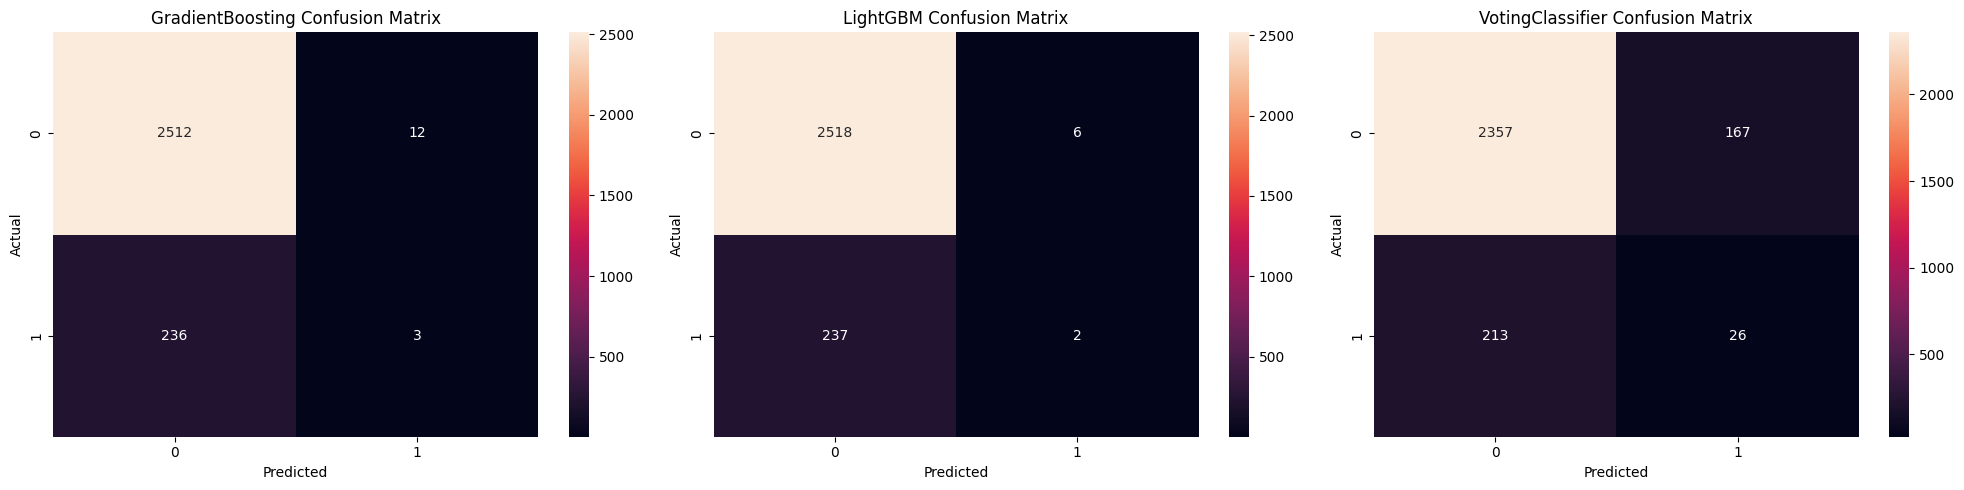

In [31]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, (name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['model'].predict(X_test_preprocessed))
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i])
    axes[i].set_title(f'{name} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
plt.tight_layout()
plt.savefig("confusion_matrix.pdf", format="pdf")
plt.show()

## Load results again

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import pickle

# Create directories if they don't exist
os.makedirs('figures', exist_ok=True)
os.makedirs('results', exist_ok=True)

def save_results(results, filename='results/model_results.pkl'):
    """
    Save the results dictionary to a pickle file.
    """
    with open(filename, 'wb') as f:
        pickle.dump(results, f)
    print(f"Results saved to {filename}")

def load_results(filename='results/model_results.pkl'):
    """
    Load the results dictionary from a pickle file.
    """
    with open(filename, 'rb') as f:
        results = pickle.load(f)
    print(f"Results loaded from {filename}")
    return results



In [15]:
results = load_results()

Results loaded from results/model_results.pkl


In [16]:
# Initialize a list to store performance metrics
performance_metrics = []

# Print results, plot feature importance, and save metrics
def process_results(results):
    for name, result in results.items():
        print(f"\nResults for {name}:")
        print(f"Best parameters: {result['best_params']}")
        print(f"Accuracy: {result['accuracy']:.4f}")
        print(f"Precision: {result['precision']:.4f}")
        print(f"Recall: {result['recall']:.4f}")
        print(f"F1 Score: {result['f1']:.4f}")
        print(f"ROC AUC: {result['roc_auc']:.4f}")
        print(f"Cross-validation scores: {result['cv_scores']}")
        print(f"Mean CV Score: {np.mean(result['cv_scores']):.4f} (+/- {np.std(result['cv_scores']) * 2:.4f})")
        
        # Append performance metrics to the list
        performance_metrics.append({
            'Model': name,
            'Accuracy': result['accuracy'],
            'Precision': result['precision'],
            'Recall': result['recall'],
            'F1 Score': result['f1'],
            'ROC AUC': result['roc_auc'],
            'Mean CV Score': np.mean(result['cv_scores']),
            'CV Score Std': np.std(result['cv_scores']) * 2
        })
        
        # Plot feature importance
        plt.figure(figsize=(10, 6))
        sns.barplot(x='importance', y='feature', data=result['feature_importance'].head(20))
        plt.title(f'Top 20 Feature Importance for {name}')
        plt.tight_layout()
        
        # Save the plot as a PDF
        plt.savefig(f'figures/{name}_feature_importance.pdf')
        plt.close()

    # Save performance metrics to a CSV file
    #pd.DataFrame(performance_metrics).to_csv('results/performance_metrics.csv', index=False)

    print("Figures have been saved in the 'figures' directory.")
    print("Performance metrics have been saved in 'results/performance_metrics.csv'.")

# Example usage:
# Assuming 'results' is your dictionary of model results

# Save the results
save_results(results)

# Process and visualize the results
process_results(results)

# If you need to load the results later:
# loaded_results = load_results()
# process_results(loaded_results)

Results saved to results/model_results.pkl

Results for GradientBoosting:
Best parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}
Accuracy: 0.9102
Precision: 0.8523
Recall: 0.9102
F1 Score: 0.8726
ROC AUC: 0.6313
Cross-validation scores: [0.7306701  0.99527288 0.9965621  0.99441341 0.99355393]
Mean CV Score: 0.9421 (+/- 0.2114)

Results for LightGBM:
Best parameters: {'num_leaves': 63, 'n_estimators': 200, 'learning_rate': 0.1}
Accuracy: 0.9121
Precision: 0.8565
Recall: 0.9121
F1 Score: 0.8729
ROC AUC: 0.6282
Cross-validation scores: [0.7306701  0.99570262 0.99742157 0.9965621  0.99785131]
Mean CV Score: 0.9436 (+/- 0.2130)

Results for VotingClassifier:
Best parameters: {'voting': 'soft', 'svm__C': 1.0, 'lr__C': 0.1, 'dt__max_depth': 5}
Accuracy: 0.8625
Precision: 0.8494
Recall: 0.8625
F1 Score: 0.8558
ROC AUC: 0.5858
Cross-validation scores: [0.84664948 0.92952299 0.93940696 0.93897722 0.93553932]
Mean CV Score: 0.9180 (+/- 0.0717)
Figures have been saved in the 

## SHAP Model Intepretation

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
def create_preprocessor(X):
    categorical_columns = X.select_dtypes(include=['object']).columns
    numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
    
    numeric_transformer = Pipeline([
        ('imputer', KNNImputer(n_neighbors=5)),
        ('scaler', StandardScaler())
    ])
    
    categorical_transformer = Pipeline([
        ('imputer', KNNImputer(n_neighbors=5)),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_columns),
            ('cat', categorical_transformer, categorical_columns)
        ])
    
    return preprocessor, numeric_columns, categorical_columns

In [24]:
# Create the preprocessor
preprocessor, numeric_columns, categorical_columns = create_preprocessor(X)

# Find the best performing model (you might want to adjust this criteria)
best_model_name = max(results, key=lambda x: results[x]['roc_auc'])
best_model = results[best_model_name]['model']

# Fit the preprocessor and transform the data
X_preprocessed = preprocessor.fit_transform(X)

One of the pitfalls that you can get using just feature importance is that someone who is not as data science-inclined may counter with "so for this variable, are you telling me the higher this variable is, the more likely it predicts a certain class?" Which, is not at all what it's telling you.

Feature importance refers to techniques that calculate a score for all the input features for a given model. The scores represent the “importance” of each feature. A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable.


Even in DS literate circles though, SHAP is helpful for situations where you do know what feature importances are telling you. For example, let's say your model is 80% accurate but for the 20% that isn't you're confused at some of the predictions. Using something like SHAP may help you understand edge cases and situations where the model may fail.

Oh, and a key "feature" of using SHAP is that it helps for local (per observation) interpretability. In situations where individuals are looking per prediction and want to explain what the model is doing, you can see why it's valuable.

As for the intuition behind how it works, it's been a minute since I've confirmed that this is true but the fundamental concept that SHAP uses to calculate the weight (importance) of each feature is the 'Shapley value.' In the context of a model and the features in the data, a Shapley value is the average expected marginal contribution of a feature after considering all possible combinations of features.
In detail, for a feature X{i}:
- Get all subset of features S that do not contain X{i}
- Compute the effect on predictions of adding X{i} to every subset

Also, I might be misreading, but what you're explaining as an alternative sounds like LIME, which I believe is a subset of SHAP

In [25]:
import os
import matplotlib
matplotlib.use('Agg')  # Use the 'Agg' backend which is usually more robust
import matplotlib.pyplot as plt
import shap

# Assuming best_model, X_preprocessed, y, preprocessor, categorical_columns, and numeric_columns are already defined

# Fit the model on the preprocessed data
best_model.fit(X_preprocessed, y)

# Get feature names after preprocessing
onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_feature_names = onehot_encoder.get_feature_names_out(categorical_columns)
feature_names = np.concatenate([numeric_columns, cat_feature_names])

# Calculate SHAP values
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_preprocessed)

# Create the 'figures' directory if it doesn't exist
#os.makedirs('figures', exist_ok=True)

# Visualize feature importance using SHAP summary plot
#plt.figure(figsize=(12, 10))
#shap.summary_plot(shap_values, X_preprocessed, feature_names=feature_names, plot_type="bar", max_display=20)
#plt.tight_layout()

# Save the figure with a higher DPI and without closing immediately
#plt.savefig('figures/shap_summary_plot.pdf', dpi=300, bbox_inches='tight')
p#lt.savefig('figures/shap_summary_plot.png', dpi=300, bbox_inches='tight')

# Optional: add a small delay before closing
import time
time.sleep(2)

plt.close()

NameError: name 'p' is not defined

In [20]:
import shap

In [63]:
# Assuming best_model, X_preprocessed, y, preprocessor, categorical_columns, and numeric_columns are already defined

# Fit the model on the preprocessed data
best_model.fit(X_preprocessed, y)

# Get feature names after preprocessing
onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_feature_names = onehot_encoder.get_feature_names_out(categorical_columns)
feature_names = np.concatenate([numeric_columns, cat_feature_names])

# Calculate SHAP values
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_preprocessed)

# Handle different SHAP value formats
if isinstance(shap_values, list):
    shap_values_plot = shap_values[1] if len(shap_values) > 1 else shap_values[0]
elif len(shap_values.shape) == 2:
    shap_values_plot = shap_values
else:
    raise ValueError("Unexpected SHAP values format")

# Create a dictionary to map feature names to their descriptions
feature_descriptions = {
    'RIDAGEYR': 'Age',
    'MCQ550': 'Had gallstones',
    'RIDRETH3_4.0': 'Non-Hispanic Black',
    'RIDRETH3_3.0': 'Non-Hispanic White',
    'DR1TS060': 'SFA 6:0 (Hexanoic) (gm)',
    'MCQ520': 'Abdominal pain during past 12 months?',
    'DR1TVARA': 'Vitamin A, RAE (mcg)',
    'DR1TSUGR': 'Total sugars (gm)',
    'URDACT': 'Albumin creatinine ratio (mg/g)',
    'BPQ020_1.0': 'Had High Blood Pressure',
    'BMXBMI': 'Body Mass Index (kg/m**2)',
    'LBXSBU': 'Blood Urea Nitrogen (mg/dL)',
    'DR1TS120': 'SFA 12:0 (Dodecanoic) (gm)',
    'RIAGENDR_1.0': 'Male',
    'DR1TP204': 'PFA 20:4 (Eicosatetraenoic) (gm)',
    'RIAGENDR_2.0': 'Female',
    'DR1TCRYP': 'Beta-cryptoxanthin (mcg)',
    'DR1TS100': 'SFA 10:0 (Decanoic) (gm)',
    'INDFMPIR': 'Ratio of family income to poverty'
}

# Create a pandas DataFrame with SHAP values and feature names
shap_df = pd.DataFrame(shap_values_plot, columns=feature_names)

# Calculate the mean absolute SHAP value for each feature
mean_shap = shap_df.abs().mean().sort_values(ascending=False)

# Get the top 10 features
top_10_features = mean_shap.head(10).index.tolist()

# Function to create and save SHAP plot
def create_shap_plot(plot_type, filename_prefix):
    plt.figure(figsize=(6, 2.5))  # Reduced figure size
    shap.summary_plot(
        shap_values_plot,
        X_preprocessed,
        plot_type=plot_type,
        feature_names=feature_names,
        max_display=10,
        show=False
    )
    
    # Modify y-axis labels
    ax = plt.gca()
    current_labels = [label.get_text() for label in ax.get_yticklabels()]
    new_labels = [feature_descriptions.get(label, label) for label in current_labels]
    ax.set_yticklabels(new_labels, fontsize=10)  # Reduced font size
    
    # Customize the plot
    plt.title(f"SHAP Feature Importance (Top 10) - {plot_type.capitalize()}", fontsize=10)  # Reduced font size
    if plot_type == "bar":
        plt.xlabel("mean(|SHAP value|)", fontsize=10)  # Reduced font size
    else:
        plt.xlabel("SHAP value", fontsize=10)  # Reduced font size
    plt.tight_layout()
    
    # Save the figure
    plt.savefig(f'figures/shap_{filename_prefix}_plot_top10_small.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'figures/shap_{filename_prefix}_plot_top10_small.pdf', dpi=300, bbox_inches='tight')
    plt.close()

# Create and save bar plot
create_shap_plot("bar", "bar")

# Create and save beeswarm plot
create_shap_plot("dot", "beeswarm")

# Print top 10 features and their importance
print("Top 10 features by importance:")
for feature in top_10_features:
    print(f"{feature_descriptions.get(feature, feature)}: {mean_shap[feature]:.4f}")

Top 10 features by importance:
Had gallstones: 0.2185
Age: 0.1825
Non-Hispanic Black: 0.1599
Non-Hispanic White: 0.1416
SFA 6:0 (Hexanoic) (gm): 0.1351
Vitamin A, RAE (mcg): 0.0982
Abdominal pain during past 12 months?: 0.0944
SFA 12:0 (Dodecanoic) (gm): 0.0801
Female: 0.0783
Had High Blood Pressure: 0.0775


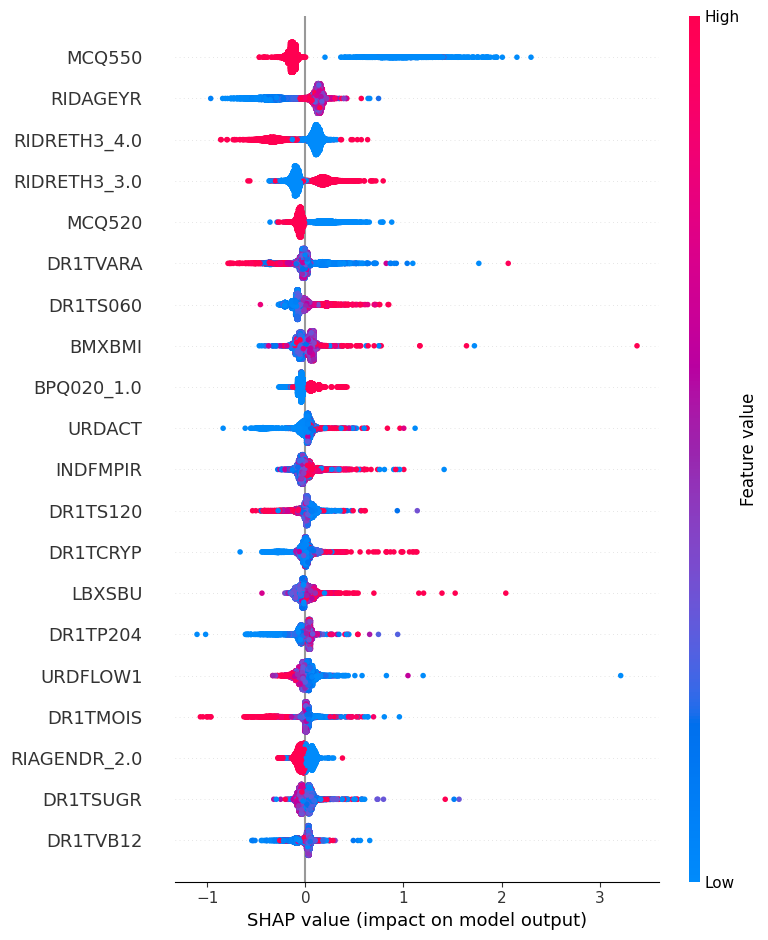

In [31]:
# Visualize SHAP values

plt.figure(figsize=(12, 10))
shap.summary_plot(shap_values, X_preprocessed, feature_names=feature_names, max_display=20)
plt.tight_layout()
plt.savefig('figures/shap_summary_plot.pdf', dpi=300, bbox_inches='tight')
plt.close()

The list on the left (MCQ550, RIDAGEYR, etc.): These are different factors that might influence kidney stone formation. They could be things like age, diet choices, or medical conditions.
The colors:

Red means the factor increases the chance of kidney stones
Blue means the factor decreases the chance of kidney stones


The spread of each row:

If the colored area spreads out wide, it means this factor has a big impact
If it's narrow, the factor doesn't affect things as much


The position of the colored areas:

If it's more to the right of the center line, it generally increases risk
If it's more to the left, it generally decreases risk



Now, let's look at some specific examples:

MCQ550 (the top row): This has a big impact. For some people, it greatly increases their risk (long red part to the right), while for others, it decreases their risk (blue part to the left).
RIDAGEYR (probably age): This mostly increases risk (more red to the right), which makes sense as kidney stones often become more common as people get older.
RIDRETH3_4.0 and RIDRETH3_3.0: These might be related to ethnicity or race. They seem to have opposite effects, with one generally increasing risk and the other decreasing it.
DR1TS060: This could be a dietary factor. It has a mixed effect, increasing risk for some and decreasing it for others.

The factors at the bottom of the list generally have smaller impacts, as their colored areas don't spread out as wide.
Overall, this graph helps us understand which factors are most important in predicting kidney stones, and whether they typically increase or decrease risk. It also shows that these factors can affect different people in different ways, which is why personalized medical advice is so important.

In [32]:
# Generate and save detailed SHAP values
shap_values_df = pd.DataFrame(shap_values, columns=feature_names)
shap_values_df.to_csv('results/shap_values.csv', index=False)

print("SHAP visualizations have been saved in the 'figures' directory.")
print("Detailed SHAP values have been saved in 'results/shap_values.csv'.")

SHAP visualizations have been saved in the 'figures' directory.
Detailed SHAP values have been saved in 'results/shap_values.csv'.


In [61]:
def explain_instance(instance_index, explainer, shap_values, X_preprocessed, feature_names):
    # Increase font sizes
    plt.rcParams.update({
        'font.size': 14,
        'axes.labelsize': 16,
        'axes.titlesize': 18,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 12,
        'figure.titlesize': 20
    })

    # Create a larger figure
    plt.figure(figsize=(24, 12))

    # Create the plot with adjusted parameters
    shap.force_plot(
        explainer.expected_value, 
        shap_values[instance_index,:], 
        X_preprocessed[instance_index,:], 
        feature_names=feature_names, 
        matplotlib=True, 
        show=False,
        text_rotation=10,  # Slightly rotate text for better readability
    )
    
    # Adjust layout to zoom in
    plt.tight_layout()
    plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.2)
    
    # Save as PNG with high DPI
    plt.savefig(f'figures/shap_force_plot_instance_{instance_index}_zoomed.pdf', dpi=300, bbox_inches='tight')
    
    plt.close()

    # Reset rcParams to default values
    plt.rcdefaults()

In [62]:
for i in range(5):
    explain_instance(i, explainer, shap_values, X_preprocessed, feature_names)

d:\Anaconda\Lib\site-packages\shap\plots\_force_matplotlib.py:347: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16032\41585978.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(24, 12))


In [57]:
# Print information about features
print("\nTotal number of features after preprocessing:", len(feature_names))
print("\nTop 20 features by SHAP importance:")
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': np.abs(shap_values).mean(0)})
print(feature_importance.sort_values('importance', ascending=False).head(20))


Total number of features after preprocessing: 366

Top 20 features by SHAP importance:
          feature  importance
25         MCQ550    0.222051
0        RIDAGEYR    0.194642
107  RIDRETH3_4.0    0.164523
106  RIDRETH3_3.0    0.144677
81       DR1TS060    0.128079
24         MCQ520    0.094725
47       DR1TVARA    0.092483
83       DR1TS100    0.073495
15         URDACT    0.063851
37       DR1TSUGR    0.063443
17         DBD895    0.062249
50       DR1TCRYP    0.061988
84       DR1TS120    0.060200
78       DR1TALCO    0.060072
92       DR1TP182    0.059903
190    BPQ020_1.0    0.059235
103  RIAGENDR_2.0    0.059007
2          BMXBMI    0.058530
95       DR1TP204    0.057450
1        INDFMPIR    0.056485


Shape_Force_Plot_instance 1: 

The red part (DR1TCAFF):

This represents caffeine intake. The long red bar stretching to the left means that for this person, their caffeine consumption is significantly increasing their risk of kidney stones. The number 14.52 tells us how much caffeine they consume averagely each day, which is very high in this case.

The blue part (DR1TMOIS):

This represents moisture or water intake. The blue bar stretching to the right means that this person's water intake is decreasing their risk of kidney stones. The number 3.54 tells us how much water they're drinking, which seems to be a good amount.

The middle line (base value: -2.74):

This is like a starting point. It represents the average risk for everyone before considering these specific factors.

The arrows:

The direction of the arrows shows whether each factor is pushing the risk higher (to the right) or lower (to the left).

Overall interpretation:
For this particular person, their high caffeine intake is significantly increasing their risk of kidney stones. However, their good water intake is partly counteracting this, reducing their risk somewhat.

Imagine we're looking at a person's risk for kidney stones, and we're considering three factors that might affect this risk. This graph shows how these factors are influencing the risk for a specific individual.

The red part (DR1TVARA):
This might represent something in their diet, like vitamin A intake. The red bar going to the left means this factor is increasing their risk of kidney stones. The negative number (-0.61) suggests this person might have a lower intake of this nutrient than average.

The first blue part (BPXODI3):
This could be related to a health measurement, perhaps blood pressure. The blue bar going right means this factor is decreasing their risk. The negative number (-1.99) might indicate this person has lower than average readings for this measure, which is good for their kidney stone risk.

The second blue part (RIDAGEYR):
This likely represents the person's age. Again, the blue bar going right means their age is working in their favor, decreasing their risk of kidney stones. The negative number (-1.25) suggests they might be younger than the average person in the study.

The middle line (f(x) = -4.07):
This is the overall risk score for this person after considering these factors. It's quite far to the left, suggesting a lower than average risk for kidney stones.

The base value (-3.0):
This represents the average risk for everyone before considering these specific factors.

Overall interpretation:
This person seems to have a lower than average risk for kidney stones. While there's one factor (possibly related to their diet) slightly increasing their risk, their age and the other health factor (possibly blood pressure) are more significantly decreasing their risk.

In simple terms, we might tell this person: "Based on these three factors, your risk for kidney stones appears to be lower than average. Your age and one of your health measurements are particularly helping to keep your risk low. There's one dietary factor that's slightly increasing your risk, but overall, the picture looks good for you."
Remember, this is a simplified view looking at just three factors. In reality, many more elements would be considered to get a full picture of someone's kidney stone risk.

In [20]:
import os
import matplotlib
matplotlib.use('Agg')  # Use the 'Agg' backend which is usually more robust
import matplotlib.pyplot as plt
import shap
import numpy as np

# Assuming best_model, X_preprocessed, y, preprocessor, categorical_columns, and numeric_columns are already defined

# Fit the model on the preprocessed data
best_model.fit(X_preprocessed, y)

# Get feature names after preprocessing
onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_feature_names = onehot_encoder.get_feature_names_out(categorical_columns)
feature_names = np.concatenate([numeric_columns, cat_feature_names])

# Calculate SHAP values
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_preprocessed)

# Handle different SHAP value formats
if isinstance(shap_values, list):
    # For multi-class problems, use the first class
    shap_values_plot = shap_values[1] if len(shap_values) > 1 else shap_values[0]
elif len(shap_values.shape) == 2:
    # For binary classification or regression
    shap_values_plot = shap_values
else:
    raise ValueError("Unexpected SHAP values format")

# Create the 'figures' directory if it doesn't exist
os.makedirs('figures', exist_ok=True)

# Set the style to match the image
plt.style.use('default')
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.size'] = 10

# Visualize feature importance using SHAP summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(
    shap_values_plot,
    X_preprocessed,
    plot_type="dot",
    feature_names=feature_names,
    max_display=12,  # Adjust this to show more or fewer features
    show=False,
    color_bar_label='Feature value',
    plot_size=(12, 8)
)

# Customize the plot
plt.gcf().axes[-1].set_aspect(100)  # Adjust the colorbar aspect ratio
plt.gcf().axes[-1].set_box_aspect(50)  # Adjust the colorbar box aspect

plt.xlabel('SHAP value (impact on model output)', fontsize=12)
plt.ylabel('')  # Remove y-axis label
plt.tight_layout()

# Add feature means to y-axis labels
ax = plt.gca()
yticks = ax.get_yticks()
feature_means = X_preprocessed.mean().values
for i, (ytick, feature_name) in enumerate(zip(yticks, ax.get_yticklabels())):
    mean = feature_means[i]
    new_label = f"{feature_name.get_text()}: {mean:.2f}"
    ax.set_yticklabels([new_label if j == i else label.get_text() for j, label in enumerate(ax.get_yticklabels())])

# Save the figure with a higher DPI and without closing immediately
plt.savefig('figures/shap_summary_plot.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/shap_summary_plot.png', dpi=300, bbox_inches='tight')

plt.close()

AttributeError: 'numpy.float64' object has no attribute 'values'